# Lab 2 : Clustering

The goal of this lab session is to code a clustering algorithm, apply it to data and compare the performance with other techniques.


We begin with the standard imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

# I - Implementation of the different clustering algorithms

We will have two toy datasets to try the different methods in order to find the most coherent groups of point for each toy dataset.

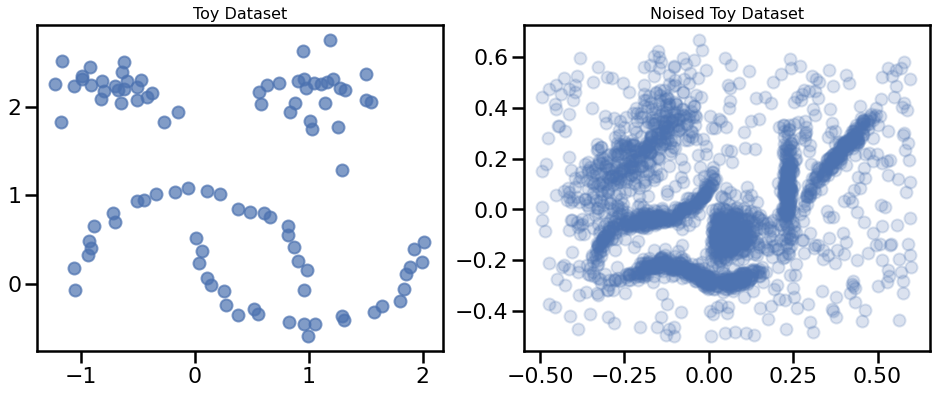

In [2]:
import sklearn.datasets as data
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data_0 = np.vstack([moons, blobs])

test_data_1 = np.load('clusterable_data.npy')

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c='b', alpha=0.7)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], color='b', alpha=0.2)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show();

## I-1 K-means

K-Means is the 'go-to' clustering algorithm for many simply because it is fast, easy to understand, and available everywhere (there's an implementation in almost any statistical or machine learning tool you care to use). However, K-Means has a few problems caused by its simplicity. 

We try the `sklearn` implementation in our toy datasets:

### Task : Train two kmeans models for datasets test_data_0 and test_data_1 with an arbitrary number of clusters then return clustering labels for datasets test_data_0 and test_data_1.

In [3]:
from sklearn.cluster import KMeans

"""
The output should be : 
kmeans_0_labels : list of labels for test_data_0
kmeans_1_labels : list of labels for test_data_1
"""
#Number of clusters
N = 4

#training model
model = KMeans(n_clusters=N,
               random_state=0)

#predciting labels
kmeans_0_labels = model.fit_predict(test_data_0)
kmeans_1_labels = model.fit_predict(test_data_1)

Text(0.5, 1.0, 'Noised Toy Dataset')

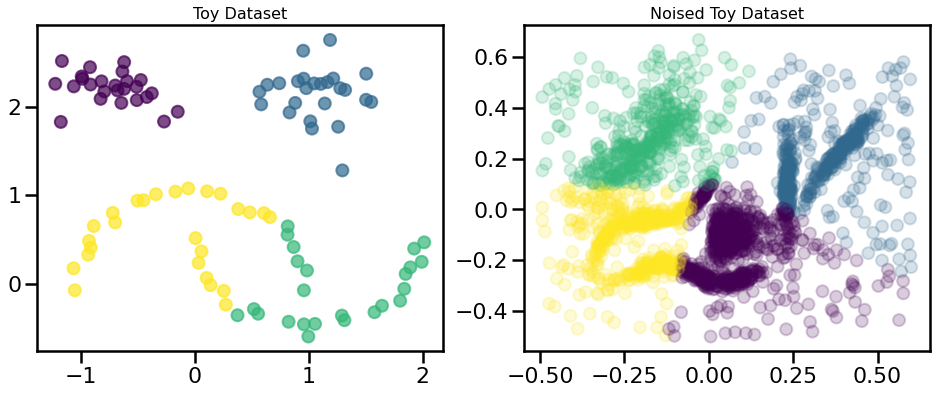

In [4]:
## Plot the results of the clustering - Run this code

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=kmeans_0_labels , alpha=0.7)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=kmeans_1_labels, alpha=0.2)
ax[1].set_title('Noised Toy Dataset', size=16)

## I-2 How do we choose the number of clusters in kmeans ? 
-By knowing in advance the number of clusters you want to create. For instance you want to divide the clients of an investment bank in three groups depicting the clients' willingness to take risks : low-risk investments clients - average risk-investments clients - high-risk investments client

-By plotting the data. Need a 2D/3D data => could be achieved by dimensionnality reduction methods like PCA or t-SNE etc...

-With metrics (Elbow method, davies-bouldin index, silhouette score)

### The elbow method :

The elbow method is often use to choose the number of cluster K. It consists in computing for several K the inertia $I_K$ induced by the clustering. Then choose $K^*$ sush as $K^* = argmax \frac{d^2}{dK^2} I_K$. It means that $K^*$ is the cutoff point where the decreasing of the inertia is going from sharp to slow.


### Question 
Find the expression of the Inertia for clustering. What could be its interpretation in terms of Variance ? 

Answer :

Accoridng to lecture slides inertia for cluster $i$ is a:

$I_i = \sum_{x \in C_i}d(x,m_i)^2$

where:
- $m_i$ is a centroid , so a avearge point in cluster $m_i = \frac{1}{n}\sum_{x \in C_i}x$, where $n$ is number of points in cluster
- $C_i$ is cluster $i$ , so set of points
- $d(x,z)$  is a distance between point $x$ and $z$ e.g eucklidean

Then the total inertia would be sum of inertias for each cluster

Inertia tells how far away the points within a cluster are.The range of inertia’s value starts from zero and goes up. Total inertia tells us how disperse are the the points with this clustering.

The inertia for clustering is analogous to the variance. The bigger the inertia the more spread the points are in their clusters.

### Question 
What could be the reason for choosing $K^*$ like that ?

Answer : 

The idea behind good clustering is having a small value of inertia, and small number of clusters. The elbow point in the inertia graph is a good choice because after that the change in the value of inertia isn’t significant.

### Task : Fill the plot_inertia fonction 

In [5]:
def plot_inertia(k_min,k_max,data):
    """ Fit several kmeans models with different K in order to find visually the optimal K with the elbow method 

    Output : 
    plot the inertia as a function of the number of clusters
    """
    inertia = []
    k_values = [k for k in range(k_min,k_max)]
    for k in range(k_min,k_max):
        #fitting model
        model = KMeans(n_clusters=k)
        model.fit(data)
        
        #storing inertia for given k
        inertia.append(model.inertia_)      
    
    plt.grid(linewidth=0.5)
    plt.plot(k_values,inertia)
    plt.scatter(k_values, inertia)
    plt.xlabel('Number of klasters')
    plt.xticks(np.arange(min(k_values), max(k_values)+1, 1.0))
    plt.yticks(np.arange(0, max(inertia), 25.0))
    plt.ylabel('Inertia')
    plt.show()

### Task : Using the plot_inertia function and the elbow method, find visually $K^*$ for test_data_0 and test_data_1 ; then plot your clusterings with the scatterplot

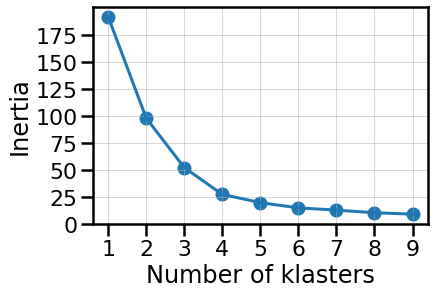

In [6]:
plot_inertia(1,10,test_data_0)

According to the above plot the elbow is at the point K = 4. This was plottedinitially, to answer the question we can rerun the cells.

Text(0.5, 1.0, 'Noised Toy Dataset')

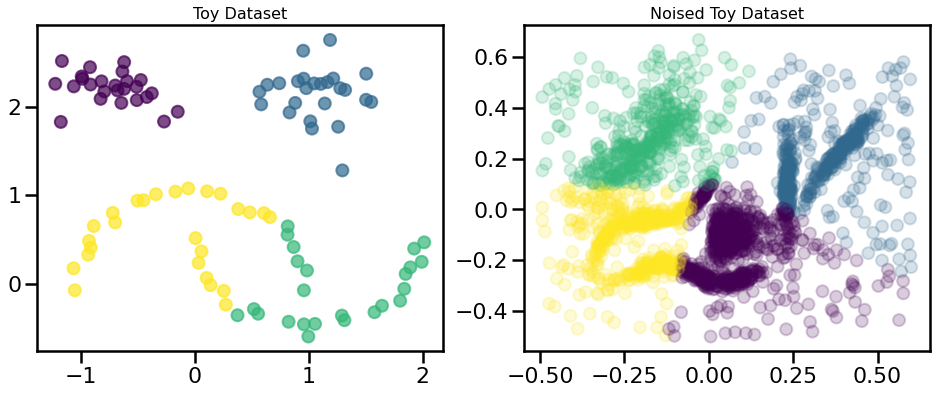

In [7]:
#Number of clusters
N = 4

#training model
model = KMeans(n_clusters=N,
               random_state=0)

#predciting labels
kmeans_0_labels = model.fit_predict(test_data_0)
kmeans_1_labels = model.fit_predict(test_data_1)

## Plot the results of the clustering - Run this code

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c=kmeans_0_labels , alpha=0.7)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c=kmeans_1_labels, alpha=0.2)
ax[1].set_title('Noised Toy Dataset', size=16)

## I-3 Aglomerative Single Linkage clustering

Agglomerative clustering is a suite of algorithms all based on the same idea. The fundamental idea is that you start with each point in it's own cluster and then, for each cluster, use some criterion to choose another cluster to merge with. Do this repeatedly until you have only one cluster and you get get a hierarchy, or binary tree, of clusters branching down to the last layer which has a leaf for each point in the dataset. The most basic version of this, single linkage, chooses the closest cluster to merge, and hence the tree can be ranked by distance as to when clusters merged/split.



### Task  : use the cluster.AgglomerativeClustering function of sklearn for dataset test_data_0 and test_data_1 with a single linka and with the number of cluster of your choice

In [8]:
#https://www.youtube.com/watch?v=RdT7bhm1M3E


class AglomerativeClusteringSingle():
    def __init__(self,num_claster):
        self.num_claster_ = num_claster
        self.labels_= None
        self.clusters_ = None
    
    @staticmethod
    def distance(x,y):
        return np.linalg.norm(x-y)
    
    def fit(self, X):
        #Initialization of labels - each element in its own cluster
        num_of_points = X.shape[0]
        self.labels_ = np.array(range(num_of_points))
        
        #Check whether number of points is bigger than number of clusters
        assert num_of_points > self.num_claster_
        
        #initiating clusters
        clusters = [[i] for i in range(num_of_points)] 
        
        #create distance matrix
        dist_matrix = np.zeros((num_of_points, num_of_points))
        for row in range(num_of_points):
            for col in range(num_of_points):
                dist_matrix[row,col] = self.distance(X[row],X[col])
                
        #performin clustering
        while(len(clusters) > self.num_claster_):
            clusters, dist_matrix = self.update_distance_matrix(dist_matrix, clusters)
        
        self.clusters_ = clusters
        
        #predicitng labels
        self.labels_= np.zeros(num_of_points)
        for i,l in enumerate(clusters):
            self.labels_[l] = i
            
        
    @staticmethod
    def update_distance_matrix(dist_matrix, clusters):

        #finding minimum coordinates
        r_min, col_min = np.where(dist_matrix == np.min(dist_matrix[np.nonzero(dist_matrix)]))
        r_min , col_min = int(r_min[0]), int(col_min[0])
        
        #creating new distane matrix
        new_distance = dist_matrix
       
        #updating distances
        col = 0
        while(col<dist_matrix.shape[1]):
            new_distance[col_min,col] = min(dist_matrix[r_min,col],
                                            dist_matrix[col_min,col])
            col += 1

        row = 0
        while(row<dist_matrix.shape[1]):
            new_distance[row,col_min] = min(dist_matrix[row,r_min],
                                            dist_matrix[row,col_min])
            row += 1

        #getting rid of columns
        new_distance = np.delete(new_distance, r_min, axis=1) 
        new_distance = np.delete(new_distance, r_min, axis=0)
        
        #updating clusters
        new_cluster = clusters[r_min] + clusters[col_min]
        clusters[col_min] = new_cluster
        del clusters[r_min]

        return clusters, new_distance

--- Fitting on test_data_0:  0.1854877471923828 seconds ---
--- Fitting on test_data_1: 294.13732862472534 seconds ---


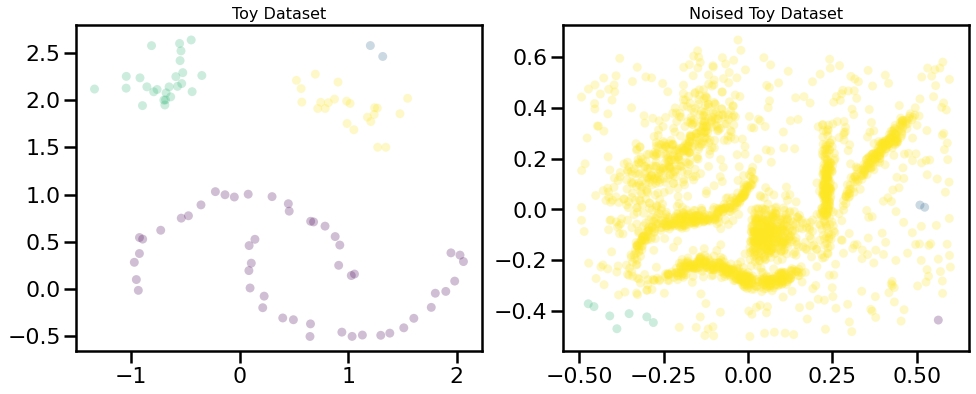

In [ ]:
import time
K = 4
start_time = time.time()

linkage_0 = AglomerativeClusteringSingle(K)
linkage_0.fit(test_data_0)

print("--- Fitting on test_data_0:  %s seconds ---" % (time.time() - start_time))

start_time = time.time()

linkage_1 = AglomerativeClusteringSingle(K)
linkage_1.fit(test_data_1)

print("--- Fitting on test_data_1: %s seconds ---" % (time.time() - start_time))


### Plot your results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = linkage_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = linkage_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

--- Fitting on test_data_0:  0.0028760433197021484 seconds ---
--- Fitting on test_data_1: 0.09836435317993164 seconds ---


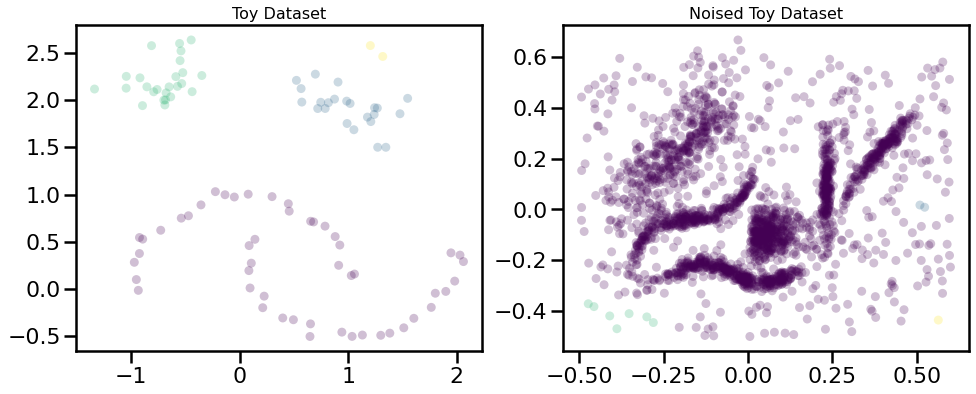

In [ ]:
#Comparing results to sklearn implementation
from sklearn.cluster import AgglomerativeClustering

K = 4
start_time = time.time()

linkage_0 = AgglomerativeClustering(K,linkage='single')
linkage_0.fit(test_data_0)

print("--- Fitting on test_data_0:  %s seconds ---" % (time.time() - start_time))

start_time = time.time()

linkage_1 = AgglomerativeClustering(K,linkage='single')
linkage_1.fit(test_data_1)

print("--- Fitting on test_data_1: %s seconds ---" % (time.time() - start_time))


### Plot your results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = linkage_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = linkage_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

Clustering done by my class is the same but slower.

### Question : Comment the results :

On the Toy Dataset green and blue clusters are quite fine. However K-means failed to identify two clusters in bottom part of graph. Instead it assigned all points below y=1 to one cluster and identified two yellow points as separate claster even though they visually should be attributed to blue claster. This is not unexpected as bottom clusters have two points around x = 0 and y = 0.5 / y=1) that are closer together than points from yellow cluster to blue cluster. This shows disadvantages of using single linkage as Single linkage method controls only nearest neighbours similarity.

On the Noised Toy Dataset however K-means algorithm performed terrible, it failed to identify any correct cluster. It assigned almost all points to one cluster and found 3 remaining clusters as some random noise points that are further away from any other points. Once again it is not unexpected as data consists a lot of points that are close, noise points which is close to the clusters and noise outliers. 

### Task : Now use the cluster.AgglomerativeClustering function for dataset test_data_0 and test_data_1 with a WARD linkage, and with the number of clusters of your choice. Then plot the results

In [ ]:
#according to description in
#https://en.wikipedia.org/wiki/Ward%27s_method
#page 5 on 
#https://hal.archives-ouvertes.fr/hal-02294847v2/document

class AglomerativeClusteringWard(AglomerativeClusteringSingle):
    def __init__(self,num_claster):
        super().__init__(num_claster)
    
    @staticmethod
    def distance(x,y):
        return np.linalg.norm(x-y)**2
    
    @staticmethod
    def update_distance_matrix(dist_matrix, clusters):
        #finding minimum coordinates
        r_min, col_min = np.where(dist_matrix == np.min(dist_matrix[np.nonzero(dist_matrix)]))
        r_min , col_min = int(r_min[0]), int(col_min[0])
        if(r_min<col_min):
            pass
        else:
            temp = r_min
            r_min = col_min
            col_min = temp

        #creating new distane matrix
        new_distance = dist_matrix
       
        #size of clusters to merge
        n_i = len(clusters[r_min])
        n_j = len(clusters[col_min])
        #distance between these clusters
        d_ij = dist_matrix[r_min,col_min]
        
        #updating distances
        col = 0
            #updating row of distnaces
        while(col<dist_matrix.shape[1]):
            if(col==r_min or col==col_min):
                col += 1
                continue
            n_k = len(clusters[col])
            d_ik = dist_matrix[r_min, col]
            d_jk = dist_matrix[col_min, col]
            
            alpha_i = (n_i + n_k) / (n_i + n_j + n_k)
            alpha_j = (n_j + n_k) / (n_i + n_j + n_k)
            beta = - n_k / (n_i + n_j + n_k)
            
            d_ijk = alpha_i*d_ik + alpha_j*d_jk + beta*d_ij
            new_distance[r_min,col] = d_ijk
            col += 1

        row = 0
            #updating column of distnaces        
        while(row<dist_matrix.shape[1]):
            if(row==r_min or row==col_min):
                row += 1
                continue            
            n_k = len(clusters[row])
            d_ik = dist_matrix[row,r_min]
            d_jk = dist_matrix[row,col_min]
            
            alpha_i = (n_i + n_k) / (n_i + n_j + n_k)
            alpha_j = (n_j + n_k) / (n_i + n_j + n_k)
            beta = - n_k / (n_i + n_j + n_k)
            
            d_ijk = alpha_i*d_ik + alpha_j*d_jk + beta*d_ij
            new_distance[row,r_min] = d_ijk
            row += 1

        #getting rid of columns
        new_distance = np.delete(new_distance, col_min, axis=1) 
        new_distance = np.delete(new_distance, col_min, axis=0)
        
        #updating clusters
        new_cluster = clusters[r_min] + clusters[col_min]
        clusters[r_min] = new_cluster
        del clusters[col_min]
        return clusters, new_distance

--- Fitting on test_data_0:  0.24495434761047363 seconds ---
--- Fitting on test_data_1: 312.79351353645325 seconds ---


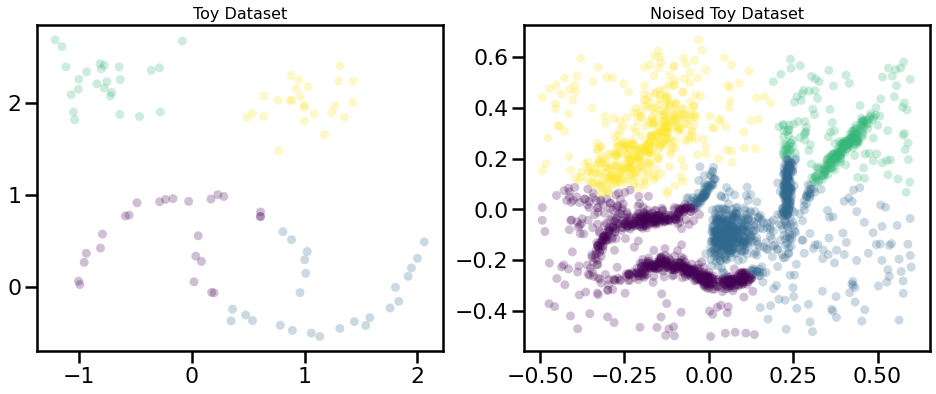

In [ ]:
import time
K = 4
start_time = time.time()

linkage_0 = AglomerativeClusteringWard(K)
linkage_0.fit(test_data_0)

print("--- Fitting on test_data_0:  %s seconds ---" % (time.time() - start_time))

start_time = time.time()

linkage_1 = AglomerativeClusteringWard(K)
linkage_1.fit(test_data_1)

print("--- Fitting on test_data_1: %s seconds ---" % (time.time() - start_time))


### Plot your results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = linkage_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = linkage_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

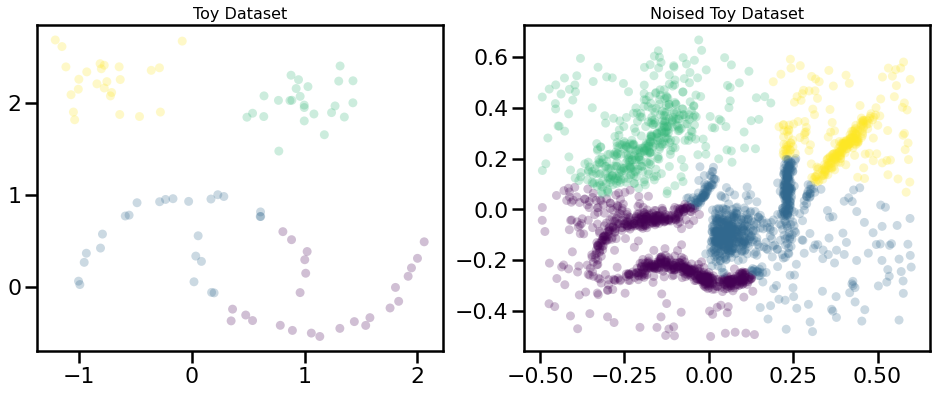

In [ ]:
from sklearn.cluster import AgglomerativeClustering

K = 4
#fitting models on both dataset
linkage_0 = AgglomerativeClustering(K,linkage='ward')
linkage_0.fit(test_data_0)

linkage_1 = AgglomerativeClustering(K,linkage='ward')
linkage_1.fit(test_data_1)

### Plot your results
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].scatter(test_data_0.T[0], test_data_0.T[1], c = linkage_0.labels_, **plot_kwds)
ax[0].set_title('Toy Dataset', size=16)

ax[1].scatter(test_data_1.T[0], test_data_1.T[1], c = linkage_1.labels_, **plot_kwds)
ax[1].set_title('Noised Toy Dataset', size=16)

plt.show()

Clustering done by my class is the same but slower.

### Question : Give a possible explanation of why ward linkage performs better than single linkage

As it is indicated in sikit-learn documentation single linkage performs poorly in presence of noise while Ward linkage is more effective method for noisy data. However still we can't say that ward linkage method identified clusters perfectly, as whenever cluster was more elipsoid than circle it was usually cut into different clusters at some point (look at purple/blue line-cluster)

Ward linkage algorithm optimizes the increase in variance for the cluster being merged. Forming one cluster from two small clusters will automatically increase the deviation of the points from its centroid so we pick a pair of clusters which will cause smallest increase in variance and them merge them. That's why clusters are more concentrated around one point (centroid of cluster). In our case it performed better as clusters were usually concentrated (blue cluster and green cluster in noised dataset) and also quite close together. Therefor the single linkage failed to seperate them (because of few close neighbour points) while ward linkage took into consideration all points that are already in cluster. 

## I-4 DBSCAN

DBSCAN is a density based algorithm -- it assumes clusters for dense regions. It is also the first actual clustering algorithm we've looked at: it doesn't require that every point be assigned to a cluster and hence doesn't partition the data, but instead extracts the 'dense' clusters and leaves sparse background classified as 'noise'. In practice DBSCAN is related to agglomerative clustering. As a first step DBSCAN transforms the space according to the density of the data: points in dense regions are left alone, while points in sparse regions are moved further away. Applying single linkage clustering to the transformed space results in a dendrogram, which we cut according to a distance parameter (called epsilon or `eps` in many implementations) to get clusters. Importantly any singleton clusters at that cut level are deemed to be 'noise' and left unclustered. 

### Task : Apply it to the test_data and plot the results. How do you tune the parameters?

In [ ]:
from sklearn.cluster import DBSCAN

def plot_DBSCAN(data,MinPts,eps):
    #fitting models
    linkage = DBSCAN(eps=eps, min_samples=MinPts).fit(data)

    ### Plot your results
    plt.figure(figsize=(8,6), dpi=80)
    plt.scatter(data.T[0], data.T[1], c = linkage.labels_, **plot_kwds)
    plt.show()

Typically, we should set minPts to be greater or equal to the number of dimensionality of our dataset. We also, often see people multiplying the number of features by 2 to determine their minPts value. Much like the “Elbow Method” used to determine the optimal epsilon value the minPts heuristic isn’t correct 100% of the time. Therefore in our case we choose number of minimum points to 4. So far we use epsilon to be random - let say 0.1

There are also some heuristics about tuneing these parameters I found:
- The larger the data set, the larger the value of MinPts should be
- If the data set is noisier, choose a larger value of MinPts
- Generally, MinPts should be greater than or equal to the dimensionality of the data set
- For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
- If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).

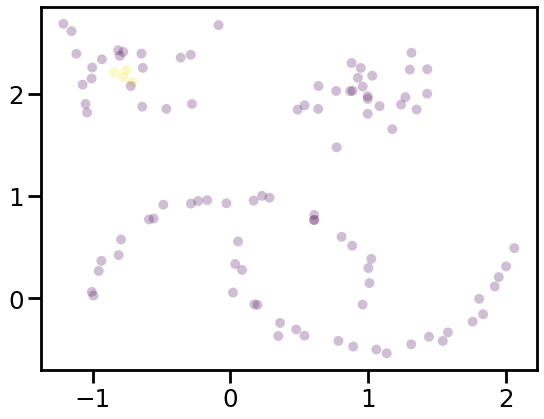

In [ ]:
plot_DBSCAN(data = test_data_0, MinPts = 4,eps = 0.1)

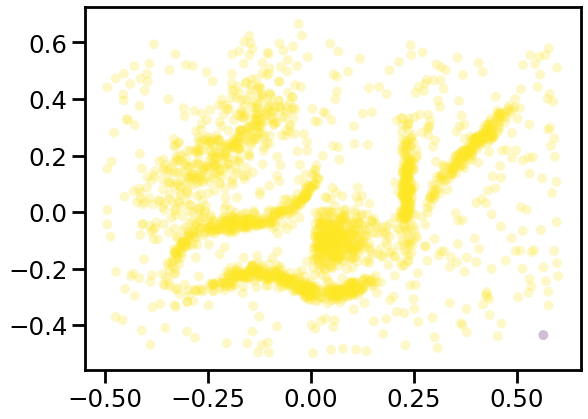

In [ ]:
plot_DBSCAN(data = test_data_1, MinPts = 4,eps = 0.1)

We can see that this approach doesn't work perfectly. Let us try to tune epsilon parameter by elbow method. Therefore we calculate the average distance between each point and its closest/nearest neighbors using k-NN with k equal to minimum points. We then plot a k-distance and choose the epsilon value at the “elbow” of the graph. On the y-axis, we plot the average distances and the x-axis all the data points in your dataset.

In [ ]:
from sklearn.neighbors import NearestNeighbors

def plot_elbow_trick(data, MinPts):
    nearest_neighbors = NearestNeighbors(n_neighbors=MinPts)
    neighbors = nearest_neighbors.fit(data)
    distances, indices = neighbors.kneighbors(data)
    
    distances = np.mean(distances,axis=1)
    distances = np.sort(distances)
    
    fig = plt.figure(figsize=(10, 5))
    plt.plot(distances)
    plt.xlabel("Points")
    plt.ylabel("Distance")

Based on heuristics defined eralier we choose MinPts to be 4.

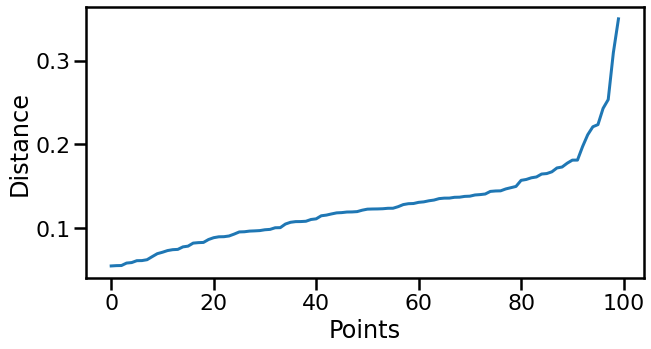

In [ ]:
plot_elbow_trick(test_data_0,4)

We can see "elbow" located around distance equal to 0.2, therefore we set epsilon to 0.2

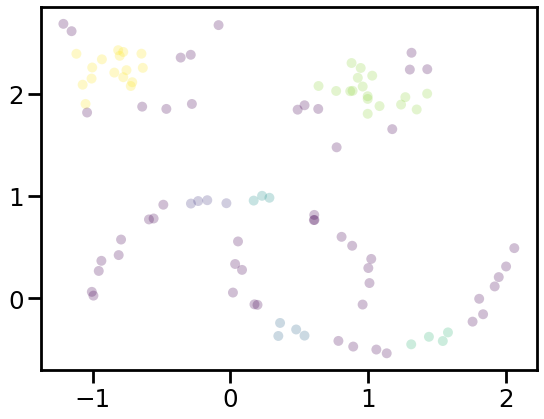

In [ ]:
plot_DBSCAN(data = test_data_0, MinPts = 4,eps = 0.2)

We can see that there is a lot of points classified as Noise Points. Let us increase epsilon then so points from bigger neighbourhood will be classified to the same cluster. 

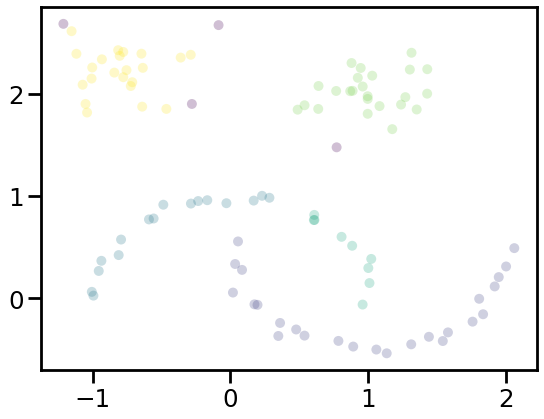

In [ ]:
plot_DBSCAN(data = test_data_0, MinPts = 4,eps = 0.3)

We can see that clustering now is better than in case of epsilon 0.2

We can visualy verify that clustering performance increased, however it is still not perfect asturquois turquoise and blue clusters should be considered the same cluster. Let us try to apply the same to noisy data. Based on heuristics described earlier we choose MinPts to be 8 as data is very noisy and the dataset is big

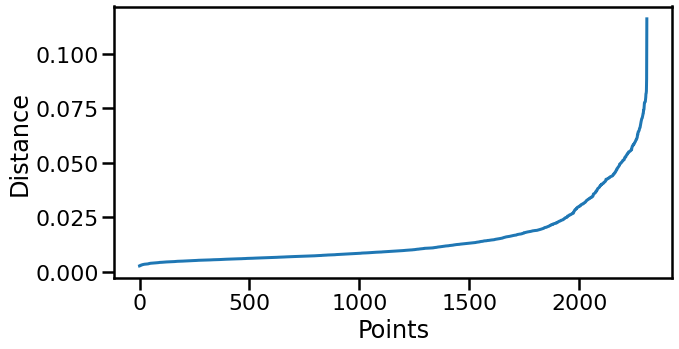

In [ ]:
plot_elbow_trick(test_data_1,8)

Once again we choose epsilon to be around "elbow" on the graph which is 0.03

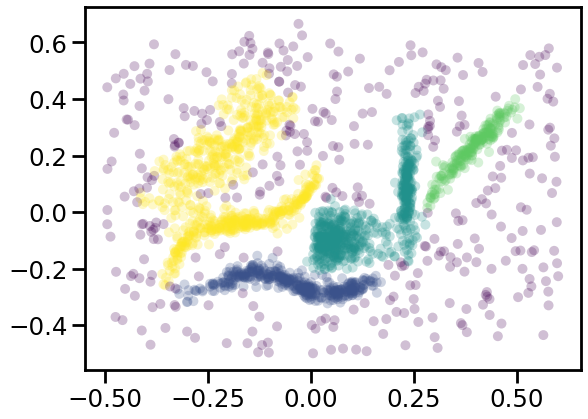

In [ ]:
plot_DBSCAN(data = test_data_1, MinPts = 8,eps = 0.03)

Let's check whether we can fine tune epsilon more. I am gonna look at close neighbourhood of epsilon equal to 0.03 to see clustering performance

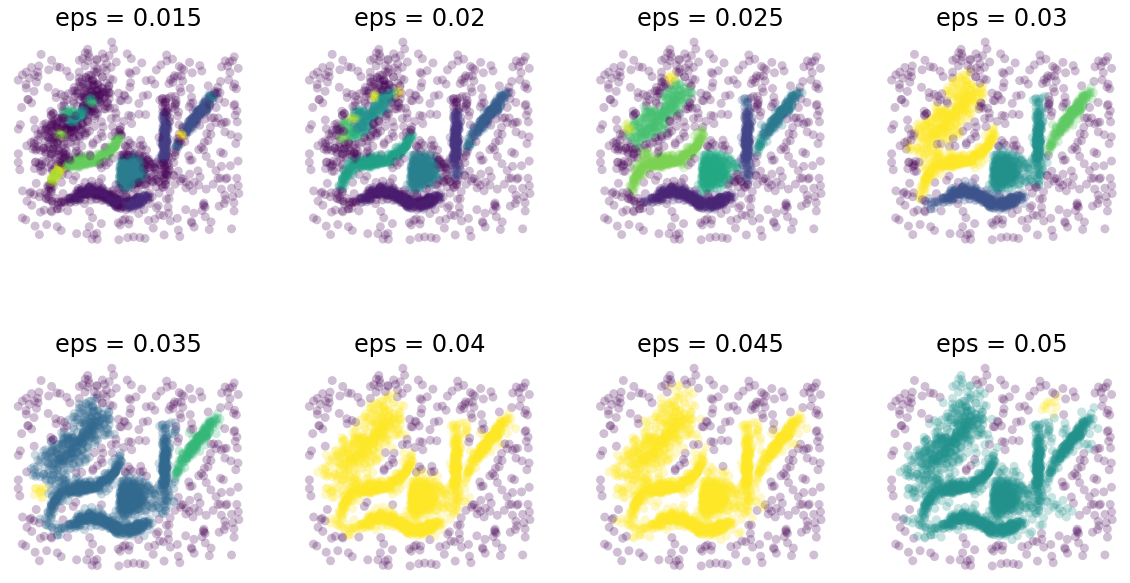

In [ ]:
MinPts = 8
eps_0 = 0.03
delta = 0.005

fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in range(8):
    eps = eps_0+delta*(x-3)
    db = DBSCAN(eps=eps, min_samples=MinPts).fit(test_data_1)
    labels = db.labels_
    
    ax = fig.add_subplot(2, 4, i)
    ax.set_title("eps = {}".format(round(eps, 3)))
    ax.axis('off')
    ax.scatter(test_data_1.T[0], test_data_1.T[1], c = labels, **plot_kwds)
    
    i += 1

We can see thta for epsilon 0.025 the clustering is a little better than for epsilon 0.03 as upper left set is divided into two clusters

## HDBSCAN

HDBSCAN is a recent algorithm developed by some of the same people who wrote the original DBSCAN paper. Their goal was to allow varying density clusters. The algorithm starts off much the same as DBSCAN: we transform the space according to density, exactly as DBSCAN does, and perform single linkage clustering on the transformed space. Instead of taking an epsilon value as a cut level for the dendrogram however, a different approach is taken: the dendrogram is condensed by viewing splits that result in a small number of points splitting off as points 'falling out of a cluster'. This results in a smaller tree with fewer clusters that 'lose points'. That tree can then be used to select the most stable or persistent clusters. This process allows the tree to be cut at varying height, picking our varying density clusters based on cluster stability.

The primary parameter to effect the resulting clustering is min_cluster_size. Ideally this is a relatively intuitive parameter to select – set it to the smallest size grouping that you wish to consider a cluster. Increasing the min_cluster_size to 30 reduces the number of clusters, merging some together.

In [8]:
import hdbscan

model = hdbscan.HDBSCAN(min_cluster_size = 10,
                        min_samples = 20)

labels = model.fit_predict(test_data_1)

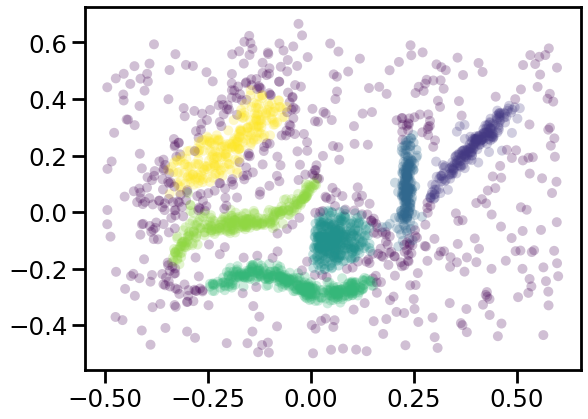

In [9]:
### Plotting results
plt.figure(figsize=(8,6), dpi=80)
plt.scatter(test_data_1.T[0], test_data_1.T[1], c = labels, **plot_kwds)
plt.show()

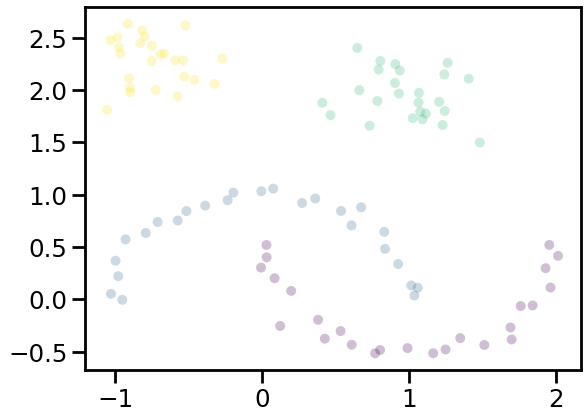

In [15]:
model = hdbscan.HDBSCAN(min_cluster_size = 8,
                        min_samples = 2)

labels = model.fit_predict(test_data_0)

### Plotting results
plt.figure(figsize=(8,6), dpi=80)
plt.scatter(test_data_0.T[0], test_data_0.T[1], c = labels, **plot_kwds)
plt.show()

# II Practical exercices

## II-1 NASA Curiosity Picture

- Look at following NASA photo taken by a robot in mars:


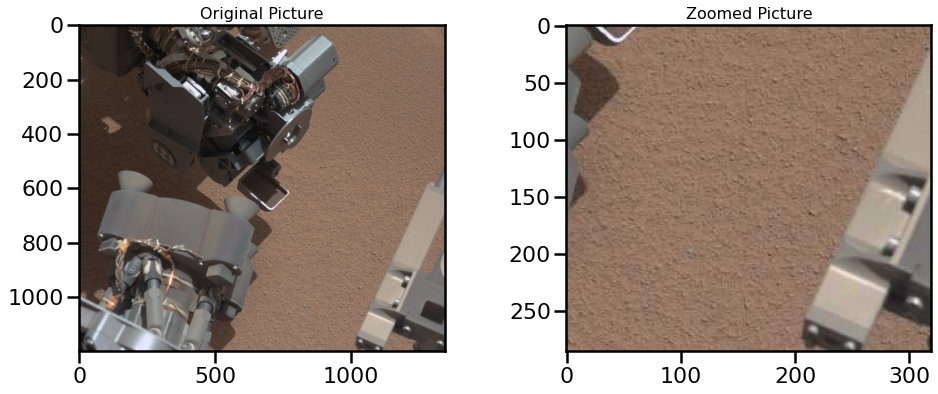

In [ ]:
from PIL import Image

Im_1  = Image.open('im_nasa_reduced.jpg')
Im_0  = Image.open('im_nasa.jpg')

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].imshow(Im_0)
ax[0].set_title('Original Picture', size=16)

ax[1].imshow(Im_1)
ax[1].set_title('Zoomed Picture', size=16)

plt.show()
Im_matrix = np.array(Im_1)/255.0

Transform the image (Im_matrix) to an intensity (I) and saturation (S) representation, it helps to distinguish bright and textures.
For each pixel i we should have : 
$$I_i=\frac{R_i+G_i+B_i}{3}$$
$$S_i=1-I_i\times min(R_i, G_i, B_i)$$

### TASK : You have to create a matrix $IS$ of size $91520\times2$ such as $IS=\{I_i,S_i\}_{1\le i\le91520}$ 

tips: you can use the method $\texttt{.reshape}$ on a np.array() to give the array the size you want

In [ ]:
I = np.mean(Im_matrix, axis = 2).flatten()
S = 1-I*np.min(Im_matrix, axis = 2).flatten()
data = np.column_stack([I,S])

### TASK : Apply one clustering algorithm of your choice on dataset IS to segment the image i.e find pixels representing the robot, mars surface etc... 


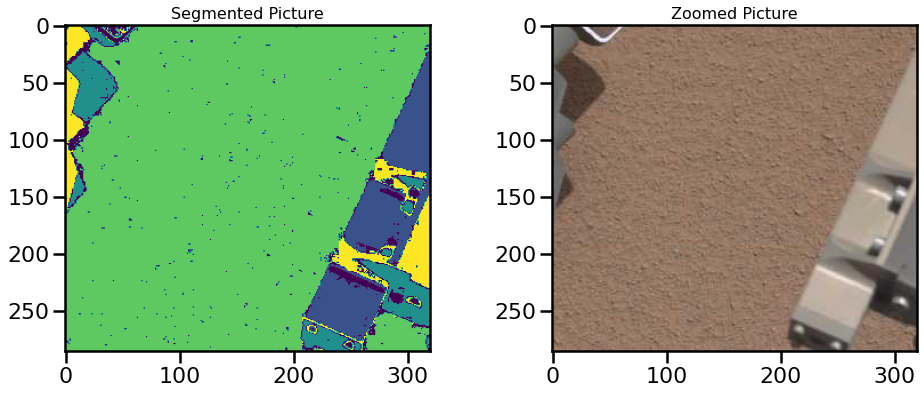

Number of clusters 5


In [ ]:
#using hdbscan 
model = hdbscan.HDBSCAN(min_cluster_size = 3000,
                        min_samples = 100)

labels = model.fit_predict(data)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].imshow(labels.reshape((Im_matrix.shape[0],Im_matrix.shape[1])))
ax[0].set_title('Segmented Picture', size=16)

ax[1].imshow(Im_1)
ax[1].set_title('Zoomed Picture', size=16)

plt.show()
print(f"Number of clusters: {len(np.unique(labels))}")

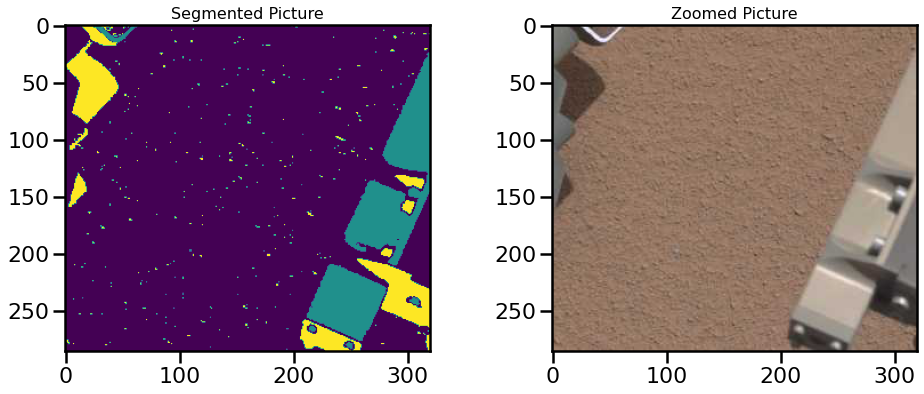

In [ ]:
N = 3
#using k-means
model = KMeans(n_clusters=N,
               random_state=0)

labels = model.fit_predict(data)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].imshow(labels.reshape((Im_matrix.shape[0],Im_matrix.shape[1])))
ax[0].set_title('Segmented Picture', size=16)

ax[1].imshow(Im_1)
ax[1].set_title('Zoomed Picture', size=16)

plt.show()

### TASK : Then Plot the segmented image and comment the results and check if you find something on mars' surface.


Images were plotted in previous cell. Both methods were able to identify some elements quite well. However ground of Mars is identified with a lot of noisy points that don't belong to the same cluster as pixels around it. Also some parts of robot is identified as shadow.

## II-2 Color compression

One interesting application of clustering is in color compression within images. 
For example, imagine you have an image with millions of colors.
In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.
Get a simplified colored version of the following image by applying k-means:

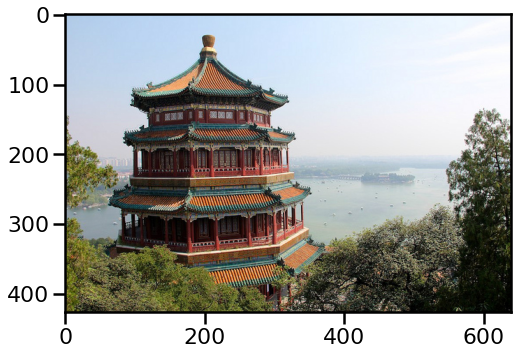

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

fig = plt.figure(figsize=(8, 6))
plt.imshow(china);

In [ ]:
data = china / 255.0 # use 0...1 scale
data = data.reshape(427 * 640, 3)

### Apply clustering methods on the colors of the image. 
For each cluster of colors you can assign a new color corresponding to the color vector of the center of the cluster. The sklearn kmeans can provide the center of each cluster with the attributes cluster_centers_

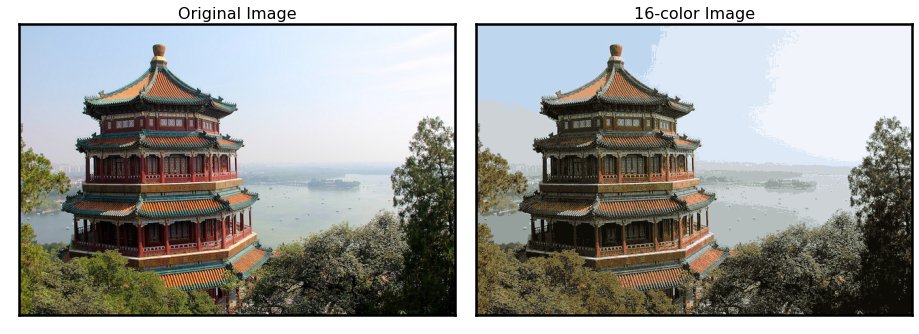

In [ ]:
N = 16
model = KMeans(n_clusters=N,
               random_state=0)

labels = model.fit_predict(data)

new_colors = np.asarray([model.cluster_centers_[i] for i in labels])

china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16);